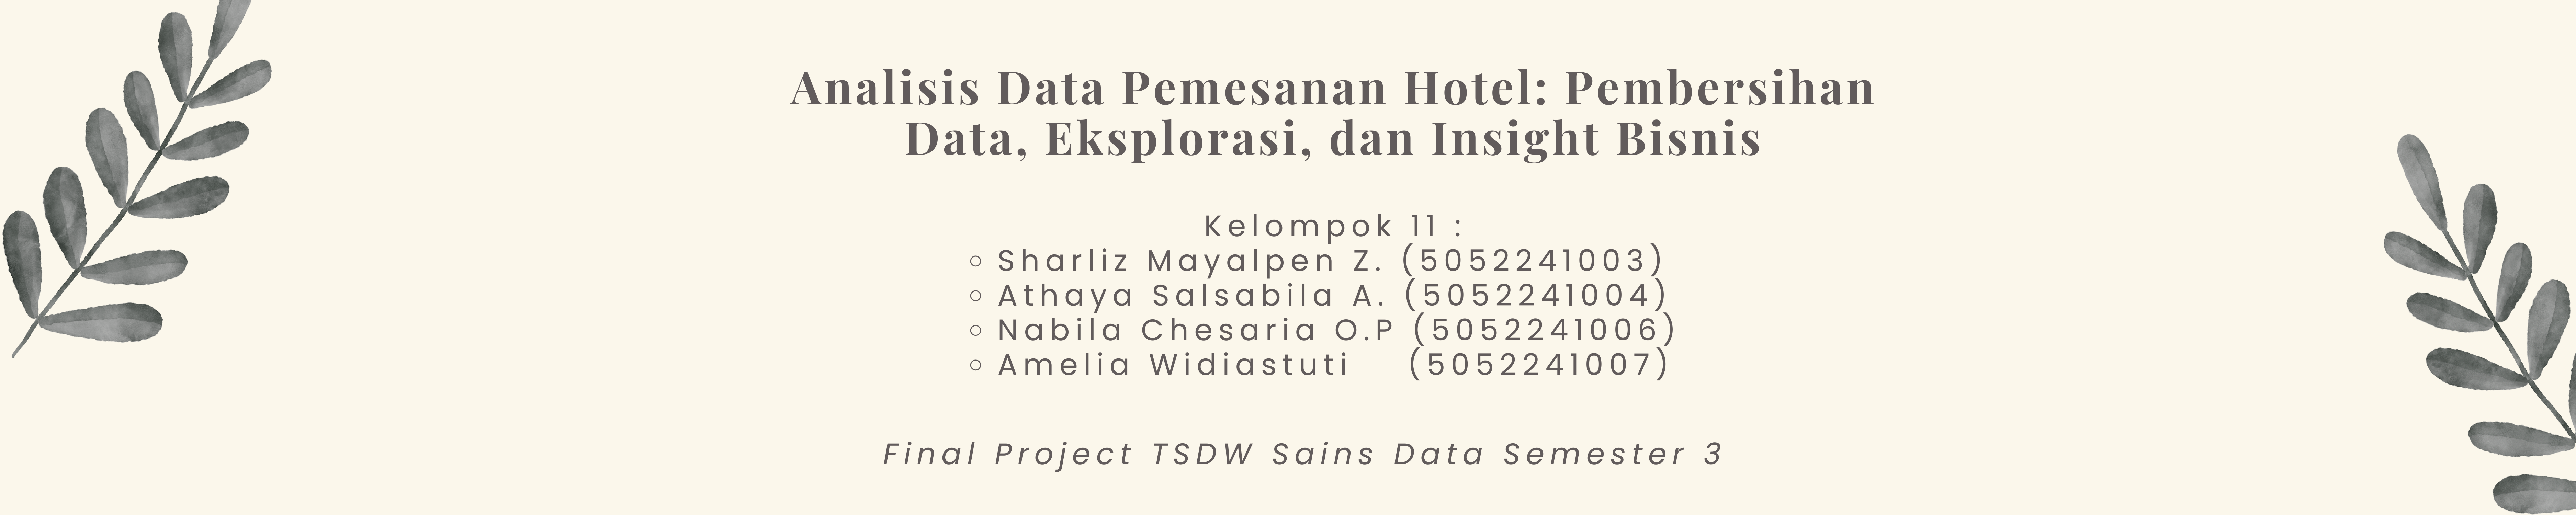

#**A. Pendahuluan**

###**Deskripsi Dataset**
Dataset *Hotel Booking Demand* merupakan kumpulan data pemesanan hotel yang berasal dari dua jenis hotel, yaitu **Resort Hotel (H1)** dan **City Hotel (H2)**. Dataset ini berisi lebih dari 30 variabel yang menggambarkan karakteristik pemesanan, profil tamu, pola pembatalan, lama menginap, saluran distribusi, metode pembayaran, permintaan khusus, hingga status akhir reservasi.

Informasi yang tersedia sangat lengkap, mencakup:

* Detail waktu pemesanan dan tanggal kedatangan tamu

* Lama tinggal pada hari kerja maupun akhir pekan

* Informasi tamu (dewasa, anak-anak, bayi)

* Riwayat tamu (repeated guest, pembatalan sebelumnya)

* Detail reservasi seperti tipe kamar, perubahan pemesanan, dan deposit

* Informasi pasar dan channel pemesanan

* Tarif harian rata-rata (Average Daily Rate)


Dataset ini memberikan gambaran menyeluruh mengenai perilaku pelanggan dan operasional pemesanan hotel, baik dari sisi bisnis maupun pelanggan.



###**Alasan Dataset Menarik**

* Dataset ini menggambarkan proses pemesanan hotel secara lengkap, mulai dari waktu booking, lama tinggal, hingga status akhir reservasi.

* Variabelnya beragam, sehingga kita bisa melihat perilaku tamu dari berbagai aspek, seperti asal negara, cara memesan, dan kebiasaan menginap.

* Data ini memungkinkan analisis pola musiman dan faktor-faktor yang memengaruhi pembatalan, yang sangat relevan bagi industri perhotelan.

* Hasil analisis dapat diterapkan langsung dalam praktik terutama dalam dunia pengembangan bisnis yang memang sedang menjadi topik yang, misalnya untuk strategi harga, meningkatkan okupansi, atau memahami segmen tamu tertentu.

###**Tujuan analisis**


* Membandingkan karakteristik pemesanan antara Resort Hotel dan City Hotel dari segi jumlah tamu, tingkat pembatalan, dan rata-rata Harga kamar.
* Mengidentifikasi faktor-faktor yang berkontribusi terhadap pembatalan pemesanan hotel untuk membantu pihak hotel meminimalkan tingkat pembatalan di masa depan
* Mengidentifikasi karakteristik segmen pelanggan yang paling sering melakukan pemesanan dan pembatalan.
* Menganalisis pola musiman pemesanan hotel sepanjang tahun dan mengidentifikasi periode puncak dan sepi.
* Menganalisis faktor yang memengaruhi Average Daily Rate (ADR)



#**B. Setup & Package**

In [144]:
import pandas as pd # Mengolah dan menganalisis data dalam bentuk DataFrame
import numpy as np # Operasi numerik dan array
import matplotlib.pyplot as plt # Visualisasi dasar seperti line plot, bar plot, dll.
import seaborn as sns # Visualisasi yang lebih menarik dan informatif
import plotly.express as px # visualisasi interaktif secara cepat dan sederhana
import plotly.graph_objects as go # visualisasi yang lebih fleksibel dan terkontrol

from sklearn.impute import SimpleImputer, KNNImputer # Mengisi nilai hilang (missing values)
from sklearn.experimental import enable_iterative_imputer # Mengaktifkan fitur IterativeImputer
from sklearn.impute import IterativeImputer # Imputasi nilai hilang berbasis model

import warnings # Mengatur atau menyembunyikan warning agar output lebih rapi
from IPython.display import display # Menampilkan DataFrame atau output lain dengan format lebih baik
import bokeh

#**C. Data Preparation**

In [145]:
url = "https://docs.google.com/spreadsheets/d/1bpyKl54SSY8iPm2UzxL4nI5bLCWlqXjOSokU1zfqwXU/export?format=csv"
hotels = pd.read_csv(url)
hotels.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [146]:
print("\tInfo Nama Kolom & Tipe Data & Banyak Value Non-Null : \n")
hotels.info()

print("\n\tInfo Statistik Deskriptif Kolom Numerik : \n")
display(hotels.describe())

	Info Nama Kolom & Tipe Data & Banyak Value Non-Null : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies               

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Ditemukan tanda tanda **missing value** tampak dari perbandingan nilai non null dengan total entries yang tidak sama untuk beberapa kolom.


---



Ditemukan juga kolom dengan **tipe data** yang kurang tepat, seperti:
* is_canceled masih int, padahal dari deskripsi harusnya boolean
* children masih float, ada kemungkinan null atau bahkan angka decimal, harus di cek lebih lanjut
* is_repeated_guest juga int. padahal datanya boolean
* agent dan company masih float, padahal menunjukkan id perusahaan
* reservation_status_date dalam object, padahal kemungkinan besar berupa tanggal (dd-mm-yyyy atau yyyy-mm-dd)



---



Terdapat pula **outlier** di beberapa kolom, seperti:
* Nilai max dari kolom lead_time = 737 atau lebih dari 2 tahun sebelum booking
* Nilai min dari kolom adr = -6, memnunjukkan error karena harga tidak mungkin negatif
* Nilai max dari kolom adr = 5400, menunjukkan outlier karena perbedaan harga dari Q3/75% sangat jauh dengan maksimum

## **Data Cleaning**

In [147]:
hotels_cleaned= hotels.copy()

## **1.) Tipe Data**

In [148]:
print("Info Nama Kolom & Tipe Data & Banyak Value Non-Null : \n")
hotels.info()

Info Nama Kolom & Tipe Data & Banyak Value Non-Null : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                


* is_canceled masih int, padahal dari deskripsi harusnya boolean
* children masih float, ada kemungkinan null atau bahkan angka decimal, harus di cek lebih lanjut
* is_repeated_guest juga int. padahal datanya boolean
* agent dan company masih float, padahal menunjukkan id perusahaan (tidak mungkin desimal -> int)
* reservation_status_date dalam object, padahal kemungkinan besar berupa tanggal (dd-mm-yyyy atau yyyy-mm-dd)



###**Cek Data Unik**

In [149]:
# Cek dulu nilai unik data, apakah yang kita anggap salah tadi benar salah atau sudah betul
print("is_canceled", hotels['is_canceled'].unique())
print("is_repeated_guest", hotels['is_repeated_guest'].unique())
print("reservation_status_date", hotels['reservation_status_date'].unique())
print("children", hotels['children'].unique())
print("agent id", hotels['agent'].unique())
print("company id", hotels['company'].unique())
print("arrival date month", hotels['arrival_date_month'])

is_canceled [0 1]
is_repeated_guest [0 1]
reservation_status_date ['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22'
 '2015-06-23' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-05-11' '2015-07-15' '2015-07-16' '2015-05-29' '2015-05-19'
 '2015-06-19' '2015-05-23' '2015-05-18' '2015-07-09' '2015-06-02'
 '2015-07-13' '2015-07-04' '2015-06-29' '2015-06-16' '2015-06-18'
 '2015-06-12' '2015-06-09' '2015-05-26' '2015-07-11' '2015-07-12'
 '2015-07-17' '2015-04-15' '2015-05-13' '2015-07-10' '2015-05-20'
 '2015-05-12' '2015-07-14' '2015-06-17' '2015-05-01' '2015-03-30'
 '2015-07-19' '2015-06-03' '2015-06-26' '2015-05-14' '2015-07-20'
 '2015-05-07' '2015-05-28' '2015-04-13' '2015-03-25' '2015-07-21'
 '2015-06-27' '2015-07-18' '2015-07-23' '2015-06-08' '2015-06-22'
 '2015-06-24' '2015-03-05' '2015-06-01' '2015-04-24' '2015-07-22'
 '2015-05-27' '2015-04-06' '2015-04-11' '2015-07-25' '2015-07-28'
 '2015-07-29' '2015-06-25' '2015-07-24' '2015-06-05' '2015-06-30'
 '2015-06-

In [150]:
# cek juga nilai unik di kolom kategori
cat_cols = hotels.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"\nKolom: {col}")
    print("Jumlah unik:", hotels[col].nunique())
    print("Nilai unik:", hotels[col].unique())


Kolom: hotel
Jumlah unik: 2
Nilai unik: ['Resort Hotel' 'City Hotel']

Kolom: arrival_date_month
Jumlah unik: 12
Nilai unik: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Kolom: meal
Jumlah unik: 5
Nilai unik: ['BB' 'FB' 'HB' 'SC' 'Undefined']

Kolom: country
Jumlah unik: 177
Nilai unik: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 

###**Pengubahan Tipe Data**

In [151]:
# Karena kolom
hotels_cleaned['is_canceled'] = hotels_cleaned['is_canceled'].astype(bool)
hotels_cleaned['is_repeated_guest'] = hotels_cleaned['is_repeated_guest'].astype(bool)
hotels_cleaned['reservation_status_date'] = pd.to_datetime(hotels_cleaned['reservation_status_date'])
month_order = ['January','February','March','April','May','June','July','August',
               'September','October','November','December']
hotels_cleaned['arrival_date_month'] = pd.Categorical(hotels_cleaned['arrival_date_month'],
                                          categories=month_order, ordered=True)
category_cols = [
    "hotel", "meal", "market_segment",
    "distribution_channel", "reserved_room_type",
    "assigned_room_type", "deposit_type",
    "customer_type", "reservation_status"
]

for col in category_cols:
    hotels_cleaned[col] = hotels_cleaned[col].astype("category")


hotels_cleaned[['is_canceled', 'is_repeated_guest', 'reservation_status_date', 'arrival_date_month',"hotel", "meal", "market_segment",
    "distribution_channel", "reserved_room_type",
    "assigned_room_type", "deposit_type",
    "customer_type", "reservation_status"]].dtypes

,0
is_canceled,bool
is_repeated_guest,bool
reservation_status_date,datetime64[ns]
arrival_date_month,category
hotel,category
meal,category
market_segment,category
distribution_channel,category
reserved_room_type,category
assigned_room_type,category


Penjelasan

menjadi **Boolean**

1. is_canceled - *status apakah booking dibatalkan atau tidak:
1 = Dibatalkan
0 = Tidak dibatalkan*

2. is_repeated_guest - *apakah tamu ini pernah menginap sebelumnya?
1 = Ya
0 = Tidak*

menjadi **Date Time**

1. reservation_status_date - *tanggal dimana status terakhir ditentukan:
Contoh:
Tanggal check-out tamu*

menjadi **Category**
1. arrival_month - memiliki kategori yaitu sebanyak 12 bulan
2. hotel - menunjukkan jenis hotel (City Hotel atau Resort Hotel). Dijadikan kategori karena hanya memiliki sedikit nilai unik dan merepresentasikan klasifikasi hotel.
3. meal - Menunjukkan jenis paket makan yang dipesan oleh tamu. Kolom ini bersifat kategorikal karena terdiri dari pilihan paket tertentu.
4. market_segment - menunjukkan segmen pasar asal booking, seperti Online TA, Corporate, atau Group.
5. distribution_channel - menunjukkan saluran distribusi pemesanan (Direct, TA/TO, dll).
5. reserved_room_type - menunjukkan tipe kamar yang dipesan oleh tamu yang bersifat kategorikal
6. assigned_room_type - menunjukkan tipe kamar yang diberikan saat check-in.
7. deposit_type - menunjukkan jenis deposit yang digunakan pada booking (No Deposit, Refundable, Non Refund).
8. customer_type - menunjukkan tipe pelanggan (Transient, Group, Contract, dll).
9. reservation_status - menunjukkan status akhir reservasi (Check-Out, Canceled, No-Show).


### **Tipe Data Akhir**

In [152]:
hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  bool          
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

## **Missing Value**

In [153]:
print("\n\tJumlah Missing Value : \n")
print(hotels.isnull().sum())

print("\n\tPersentase Missing Values per Kolom:")
print((hotels.isnull().sum() / len(hotels) * 100).round(2))


	Jumlah Missing Value : 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

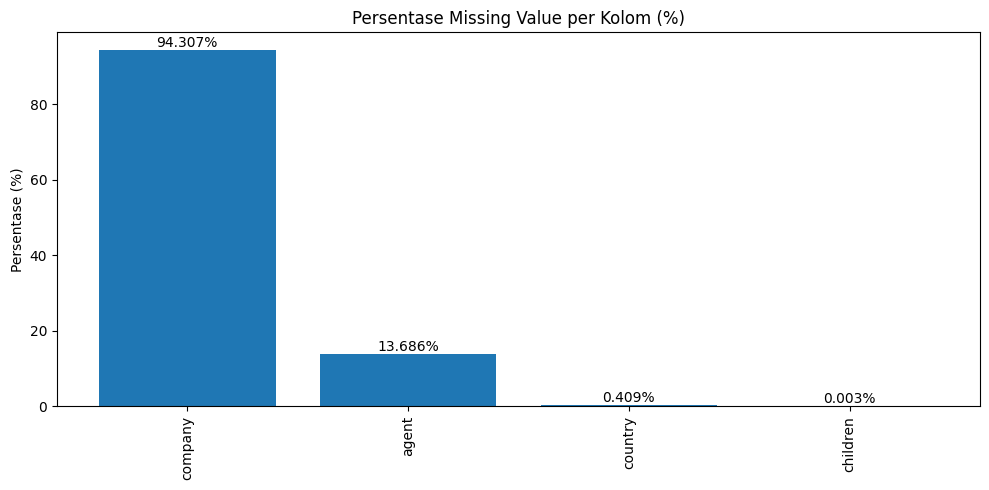

In [154]:
# Hitung persentase missing value
missing_percent = (hotels.isna().sum() / len(hotels)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
bars = plt.bar(missing_percent.index, missing_percent.values)

plt.title("Persentase Missing Value per Kolom (%)")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=90)

# Tambahkan label persen di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.3f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

###**Detail Missing Value**

*kolom **"company"***

In [155]:
print(hotels_cleaned['company'].dtype)
print("Jumlah NULL:", hotels_cleaned['company'].isna().sum())

float64
Jumlah NULL: 112593


Penjelasan

'company' memiliki sangat banyak missing (lebih dari 90%) yang mana wajar karena hanya sedikit tamu membayar via perusahaan dan bisa diisi sebagai **No Company (tanpa perusahaan)** mengingat tipe data 'company' yang juga *category*

In [156]:
hotels_cleaned['company'] = (
    hotels_cleaned['company']
    .fillna("No Company")
    .astype(str)
    .astype('category')
)

# Cek lagi
print("Missing value sesudah pengisian 'No Company' :", hotels_cleaned['company'].isna().sum())

# Cek tipe data
print("\nTipe data kolom company:", hotels_cleaned['company'].dtype)

Missing value sesudah pengisian 'No Company' : 0

Tipe data kolom company: category


*kolom **"agent"***

In [157]:
print(hotels['agent'].dtype)
print("Jumlah NULL:", hotels['agent'].isna().sum())

float64
Jumlah NULL: 16340


Penjelasan

'agent' memiliki sangat banyak missing (16340) yang mana wajar karena karena tidak semua pemesanan lewat agent dan bisa diisi sebagai **No Agent (tanpa melalui agen)** mengingat tipe data 'agent' yang juga *category*

In [158]:
hotels_cleaned['agent'] = (
    hotels_cleaned['agent']
    .fillna("No Agent")
    .astype(str)
    .astype('category')
)

# Cek lagi
print("Missing value sesudah:", hotels_cleaned['agent'].isna().sum())

# Cek tipe data
print("\nTipe data kolom Agent:", hotels_cleaned['agent'].dtype)

Missing value sesudah: 0

Tipe data kolom Agent: category


*kolom **"country"***

In [159]:
# Cek jumlah missing value di kolom country
print("Missing value sebelum:", hotels_cleaned['country'].isna().sum())

Missing value sebelum: 488


Penjelasan:

Missing value relatif kecil (~0,4%).

Bisa terjadi karena tamu tidak mengisi data negara, booking dilakukan oleh agen, atau data tidak tercatat di sistem.

Maka, Missing value diisi dengan label "Undefined".

Untuk menghindari penghapusan data yang masih berguna dan tetap memungkinkan analisis segmentasi negara tanpa bias.

In [160]:
# Isi missing value dengan "Undefined"
hotels_cleaned['country'] = hotels_cleaned['country'].fillna("Undefined")

# Cek lagi
print("\nMissing value sesudah:", hotels_cleaned['country'].isna().sum())

# Cek tipe data
print("\nTipe data kolom country:", hotels_cleaned['country'].dtype)

# Cek ada berapa "Undefined"
print("\nJumlah 'Undefined':", (hotels_cleaned['country'] == "Undefined").sum())


Missing value sesudah: 0

Tipe data kolom country: object

Jumlah 'Undefined': 488


*kolom **"children"***

In [161]:
# Cek jumlah missing value di kolom children
print("Missing value sebelum:", hotels_cleaned['children'].isna().sum())

Missing value sebelum: 4


Penjelasan

Jumlah missing sangat kecil (4 dari 119.390 baris). Dalam konteks hotel, jika tidak diisi, paling masuk akal berarti tidak ada anak.

Maka, missing value diisi dengan 0.

Karena, tidak mengubah distribusi data secara signifikan.
Secara bisnis, booking tanpa anak adalah hal yang umum.

In [162]:
# Isi missing value dengan "0"
hotels_cleaned['children'] = hotels_cleaned['children'].fillna(0).astype(int)

# Cek lagi
print("Missing value sesudah:", hotels_cleaned['children'].isna().sum())

Missing value sesudah: 0


### **Cek missing value setelah imputasi**

In [163]:
# Menampilkan jumlah missing values per kolom
print("\nJumlah Missing Values per Kolom:")
print(hotels_cleaned.isnull().sum())

# Menampilkan persentase missing values per kolom
print("\nPersentase Missing Values per Kolom:")
print((hotels_cleaned.isnull().sum() / len(hotels) * 100).round(2))


Jumlah Missing Values per Kolom:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                 



---------------------



##**Duplikasi**

**Mencari seluruh baris yang duplikat (semua kolom sama persis)**

full_duplicates = hotels_cleaned[hotels_cleaned.duplicated(keep=False)]

print(f"Jumlah baris duplikat penuh: {full_duplicates.shape[0]}")
full_duplicates.head(10)

In [164]:
full_duplicates = hotels_cleaned[hotels_cleaned.duplicated(keep=False)]

print(f"Jumlah baris duplikat penuh: {full_duplicates.shape[0]}")
full_duplicates.head(10)

Jumlah baris duplikat penuh: 40165


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,No Company,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,No Company,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,False,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,No Company,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,False,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,No Company,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,False,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,No Company,0,Transient,137.00,0,1,Check-Out,2015-07-07
43,Resort Hotel,False,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,No Company,0,Transient,137.00,0,1,Check-Out,2015-07-07
132,Resort Hotel,True,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,No Company,0,Transient,97.00,0,0,Canceled,2015-07-01
138,Resort Hotel,True,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,No Company,0,Transient,97.00,0,0,Canceled,2015-07-01
198,Resort Hotel,False,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,No Company,0,Transient,109.80,0,3,Check-Out,2015-07-08
200,Resort Hotel,False,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,No Company,0,Transient,109.80,0,3,Check-Out,2015-07-08


Penjelasan

Dari total 119.390 baris, terdapat 40.165 baris yang identik. Namun, karena dataset tidak memiliki penanda unik seperti nomor kamar, baris ini bisa saja merupakan pemesanan yang sah oleh tamu berbeda dengan kondisi yang sama. Oleh karena itu, baris duplikat ini tetap dipertahankan untuk menjaga keutuhan data.

### **Data Anomalies**

1 - Membuat fitur Total Stays & Visualisasi Awal

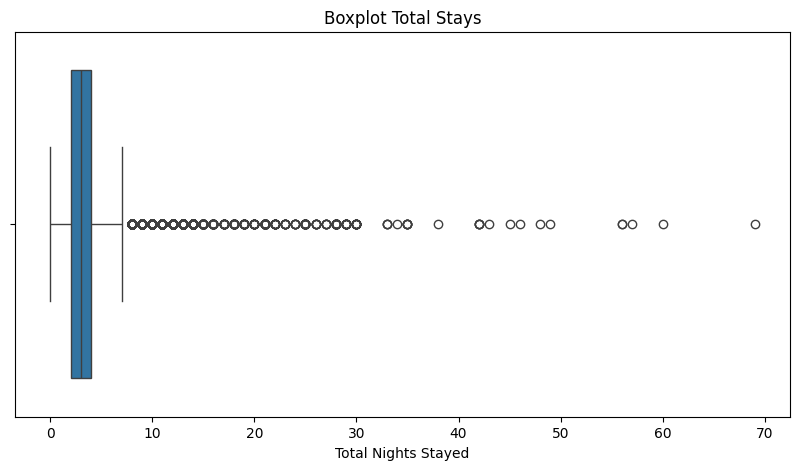

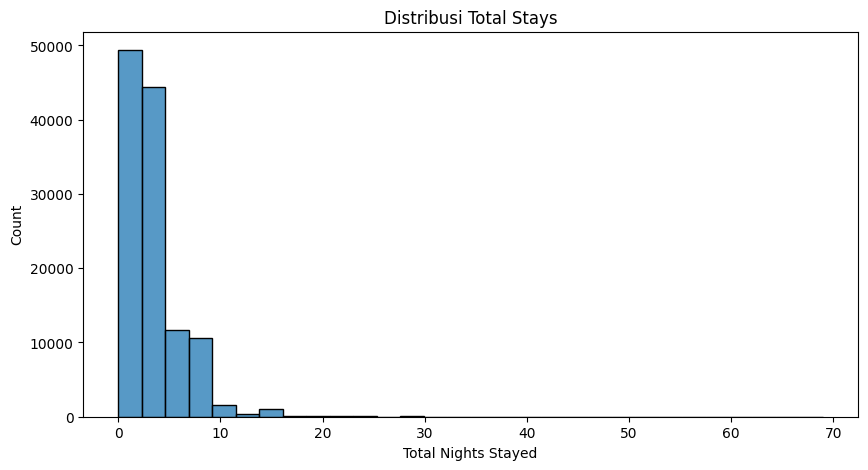

In [165]:
# Membuat total lama menginap (weekday + weekend)
hotels_cleaned['total_stays'] = (
    hotels_cleaned['stays_in_weekend_nights'] +
    hotels_cleaned['stays_in_week_nights']
)

# Visualisasi boxplot untuk mendeteksi outlier lama menginap
plt.figure(figsize=(10,5))
sns.boxplot(x=hotels_cleaned['total_stays'])
plt.title("Boxplot Total Stays")
plt.xlabel("Total Nights Stayed")
plt.show()

# Distribusi total lama menginap
plt.figure(figsize=(10,5))
sns.histplot(hotels_cleaned['total_stays'], bins=30)
plt.title("Distribusi Total Stays")
plt.xlabel("Total Nights Stayed")
plt.show()


In [166]:
# Total anak (children + babies)
hotels_cleaned['total_kids'] = (
    hotels_cleaned['children'] + hotels_cleaned['babies']
)

# Total tamu (dewasa + anak + bayi)
hotels_cleaned['total_guests'] = (
    hotels_cleaned['adults'] +
    hotels_cleaned['children'] +
    hotels_cleaned['babies']
)

# Penanda jika tidak ada tamu sama sekali
hotels_cleaned['zero_guests'] = (hotels_cleaned['total_guests'] == 0).astype(int)


2 - Anomali: Tidak ada tamu tapi menginap

Tidak ada guest tetapi menginap: 110


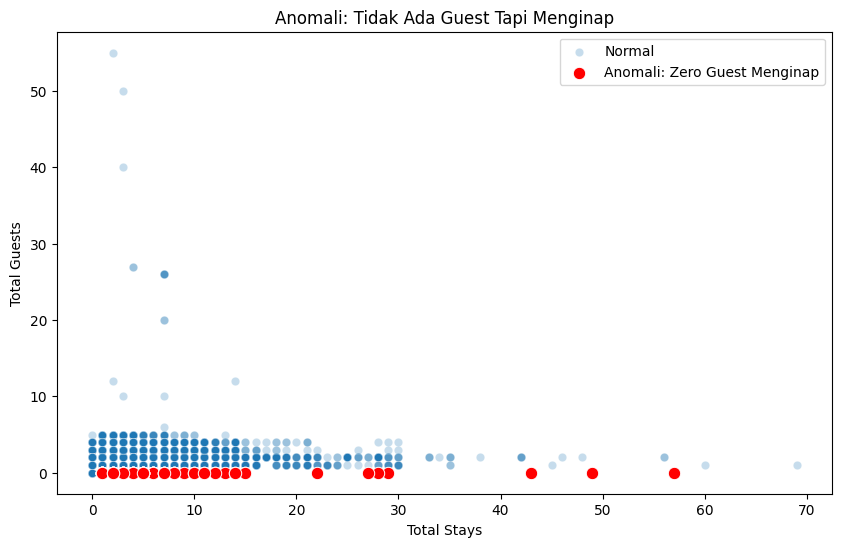

In [167]:
# Anomali: tidak ada tamu tetapi memiliki total_stays > 0
anom_zero_guest = hotels_cleaned[
    (hotels_cleaned['total_guests'] == 0) &
    (hotels_cleaned['total_stays'] > 0)
]

print("Tidak ada guest tetapi menginap:", len(anom_zero_guest))

# Visualisasi anomali
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=hotels_cleaned,
    x='total_stays',
    y='total_guests',
    alpha=0.25,
    label='Normal'
)

sns.scatterplot(
    data=anom_zero_guest,
    x='total_stays',
    y='total_guests',
    color='red',
    s=80,
    label='Anomali: Zero Guest Menginap'
)

plt.title("Anomali: Tidak Ada Guest Tapi Menginap")
plt.xlabel("Total Stays")
plt.ylabel("Total Guests")
plt.legend()
plt.show()


**Analisis:**
Tidak mungkin jika kamar dianggap "ada yang menempati" tetapi tidak tercatat satupun orang yang menginap.

**Solusi:** Karena mustahil check-in tanpa guests, maka lebih baik dihapus

In [168]:
hotels_cleaned = hotels_cleaned[~((hotels_cleaned['total_guests']==0) & (hotels_cleaned['total_stays']>0))]

3 - Anomali: Menginap tanpa adult

Adults = 0 tapi menginap: 223


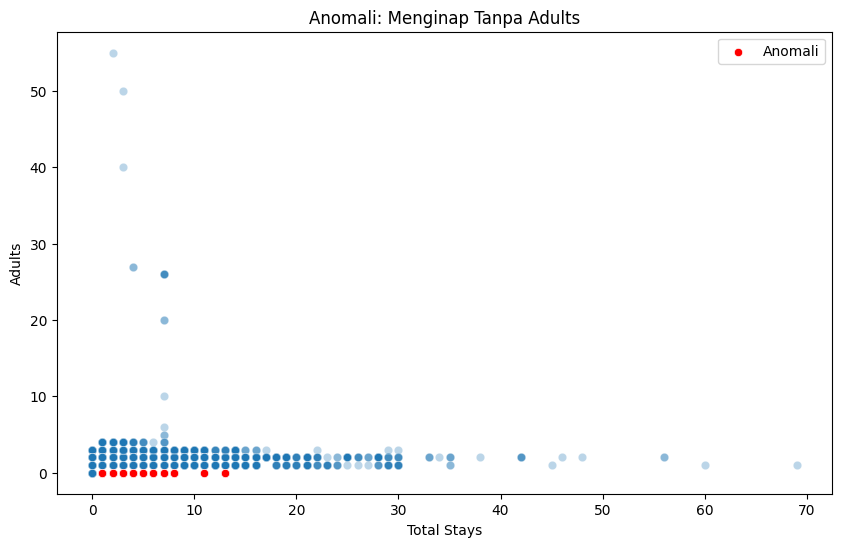

In [169]:
# Anomali: tidak ada adult tetapi ada total_stays
anom_adults_zero = hotels_cleaned[
    (hotels_cleaned['adults'] == 0) &
    (hotels_cleaned['total_stays'] > 0)
]

print("Adults = 0 tapi menginap:", len(anom_adults_zero))

plt.figure(figsize=(10,6))
sns.scatterplot(data=hotels_cleaned, x='total_stays', y='adults', alpha=0.3)
sns.scatterplot(
    data=anom_adults_zero,
    x='total_stays',
    y='adults',
    color='red',
    label='Anomali'
)
plt.title("Anomali: Menginap Tanpa Adults")
plt.xlabel("Total Stays")
plt.ylabel("Adults")
plt.legend()
plt.show()


**Analisis:**
* Tidak mungkin ada anak-anak menginap tanpa orang tua
* Dan, jika tidak ada *adults* dan tidak ada *kids* tetapi dianggap *check in*, maka pasti ada kesalahan pada data
**Solusi:** Hapus data

In [170]:
hotels_cleaned = hotels_cleaned[~((hotels_cleaned['adults']==0) & (hotels_cleaned['total_stays']>0))]

4 - Anomali: Total stay = 0 tapi booking tidak dicancel

Stay = 0 tapi tidak canceled: 680


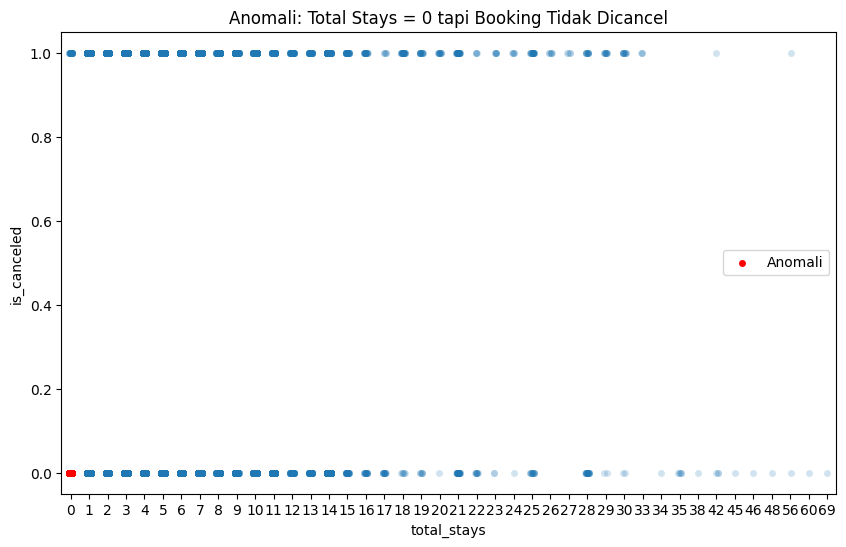

In [171]:
# Anomali: total_stays = 0 tetapi booking tidak dicancel
anom_zero_stay = hotels_cleaned[
    (hotels_cleaned['total_stays'] == 0) &
    (hotels_cleaned['is_canceled'] == False)
]

print("Stay = 0 tapi tidak canceled:", len(anom_zero_stay))

plt.figure(figsize=(10,6))
sns.stripplot(
    data=hotels_cleaned,
    x='total_stays',
    y='is_canceled',
    alpha=0.2
)
sns.stripplot(
    data=anom_zero_stay,
    x='total_stays',
    y='is_canceled',
    color="red",
    label="Anomali"
)
plt.title("Anomali: Total Stays = 0 tapi Booking Tidak Dicancel")
plt.show()


**Analisis:** Hal ini bisa dianggap valid dengan kemungkinan:
1. Tamu Check-in dan check-out di hari yang sama.
2. Day use rooms atau kamar yang bisa disewa saat siang-sore hari

**Solusi:** Karena ada kemungkinan data valid bila 2 skema di atas benar, maka solusinya pertahankan saja

5 - Anomali: Jumlah anak lebih banyak dari dewasa

Kids > adults: 257


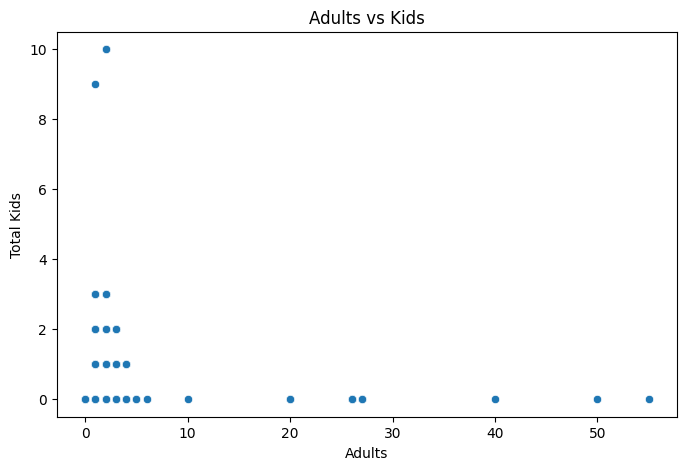

In [172]:
# Anomali: jumlah anak lebih banyak dari dewasa
anom_kids = hotels_cleaned[
    hotels_cleaned['total_kids'] > hotels_cleaned['adults']
]

print("Kids > adults:", len(anom_kids))

plt.figure(figsize=(8,5))
sns.scatterplot(data=hotels_cleaned, x='adults', y='total_kids')
plt.title("Adults vs Kids")
plt.xlabel("Adults")
plt.ylabel("Total Kids")
plt.show()


**Analisis:** Hal ini bisa dianggap valid dengan kemungkinan:
1. Trip sekolah, maka pendamping tidak dicatat di semua kamar yang dipakai (misal guru hanya memakai 2 kamar, sedangkan siswa 8 kamar, maka di 8 kamar tidak akan ada adults yg tercatat)

**Solusi:** Karena ada kemungkinan data valid bila skema di atas benar, maka solusinya pertahankan saja

6 - Anomali Harga (ADR ekstrem / negatif)

ADR outlier ekstrem: 2


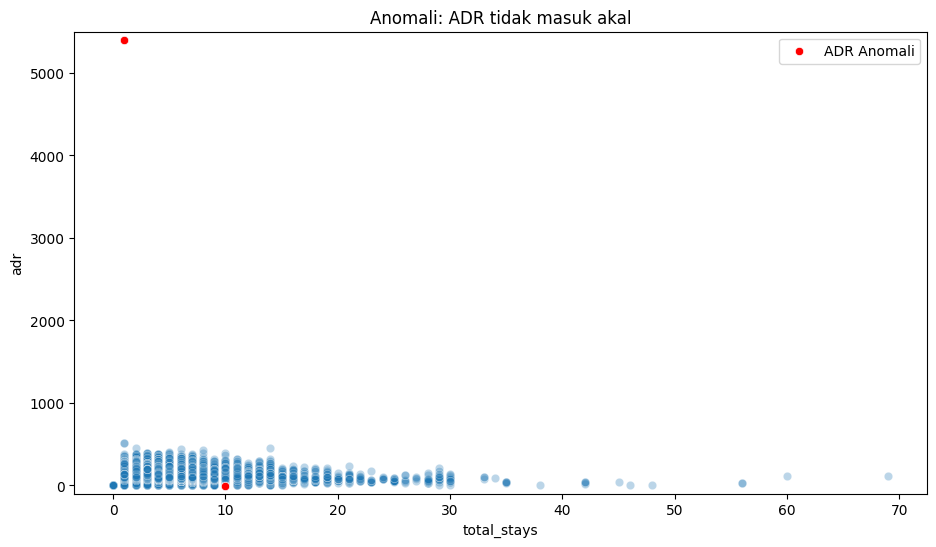

In [173]:
anom_adr = hotels_cleaned[(hotels_cleaned['adr'] < 0) | (hotels_cleaned['adr'] > 2000)]
print("ADR outlier ekstrem:", len(anom_adr))
plt.figure(figsize=(11,6))
sns.scatterplot(data=hotels_cleaned, x='total_stays', y='adr', alpha=0.3)
sns.scatterplot(data=anom_adr, x='total_stays', y='adr', color="red", label="ADR Anomali")
plt.ylim(-100, 5500)
plt.title("Anomali: ADR tidak masuk akal")
plt.show()


**Analisis:** Hal ini tidak bisa dianggap valid, jika:
1. ADR < 0, tidak mungkin harga kamar 0 atau negatif.
2. ADR > 3000, harga terlalu tinggi

**Solusi:** Hapus jika anomali < 5%, atau pakai metode hapus 1% dan pertahankan 99% setelah hapus data minus.

ADR vs Total Stays (baseline normal)

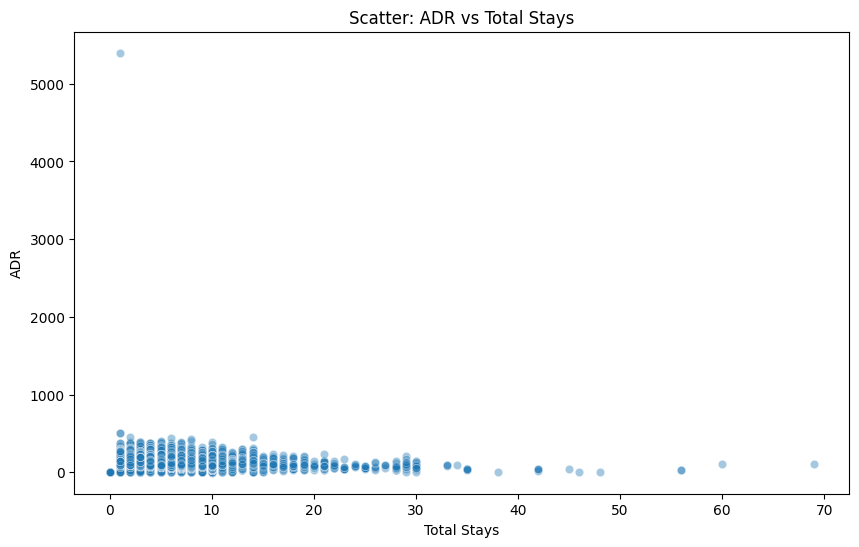

In [174]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=hotels_cleaned, x='total_stays', y='adr', alpha=0.4)
plt.title("Scatter: ADR vs Total Stays")
plt.xlabel("Total Stays")
plt.ylabel("ADR")
plt.show()


ADR vs Room Type

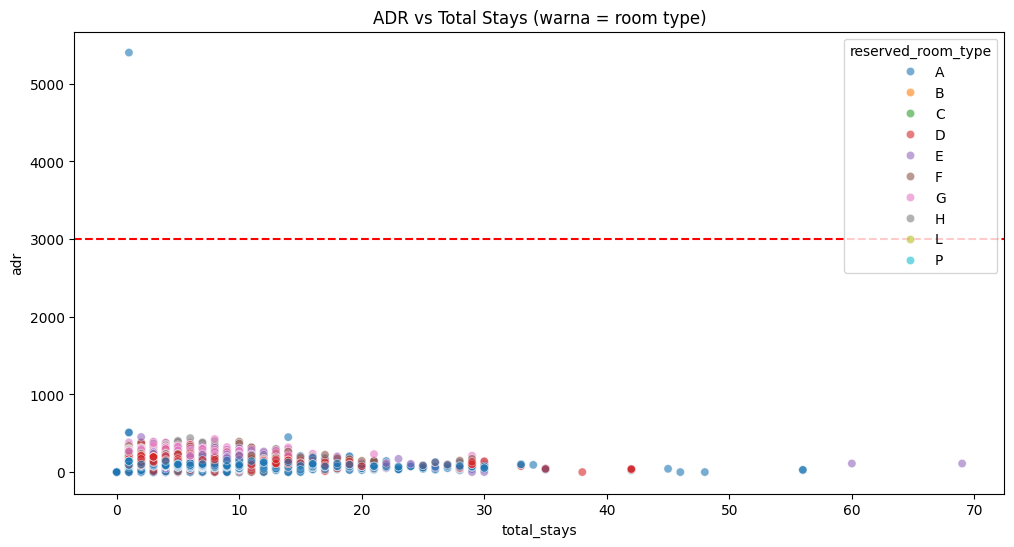

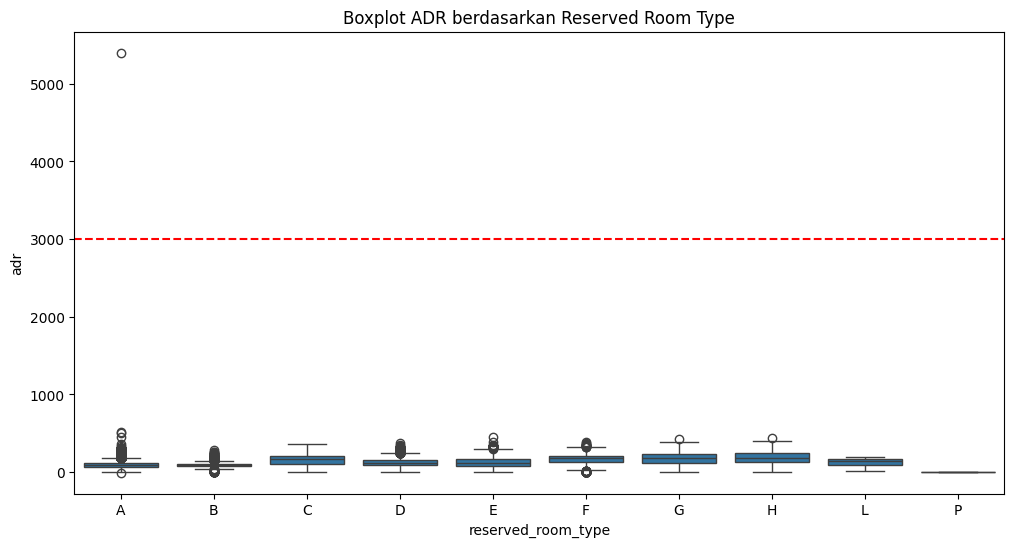

In [175]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=hotels_cleaned,
    x='total_stays',
    y='adr',
    hue='reserved_room_type',
    alpha=0.6
)
plt.axhline(3000, color='red', linestyle='--')
plt.title("ADR vs Total Stays (warna = room type)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=hotels_cleaned, x='reserved_room_type', y='adr')
plt.axhline(3000, color='red', linestyle='--')
plt.title("Boxplot ADR berdasarkan Reserved Room Type")
plt.show()

In [176]:
# 1. Pastikan ADR positif (hapus nilai negatif)
hotels_cleaned = hotels_cleaned[hotels_cleaned['adr'] > 0].copy()

# 2. Hitung batas percentile 1–99 dari ADR yang sudah positif
low, high = hotels_cleaned['adr'].quantile([0.01, 0.99])

# 3. Hapus outlier berdasarkan percentile
hotels_cleaned = hotels_cleaned[(hotels_cleaned['adr'] >= low) &(hotels_cleaned['adr'] <= high)].copy()

7 - Anomali: Parking spaces lebih banyak dari adults

Parking > adults: 7


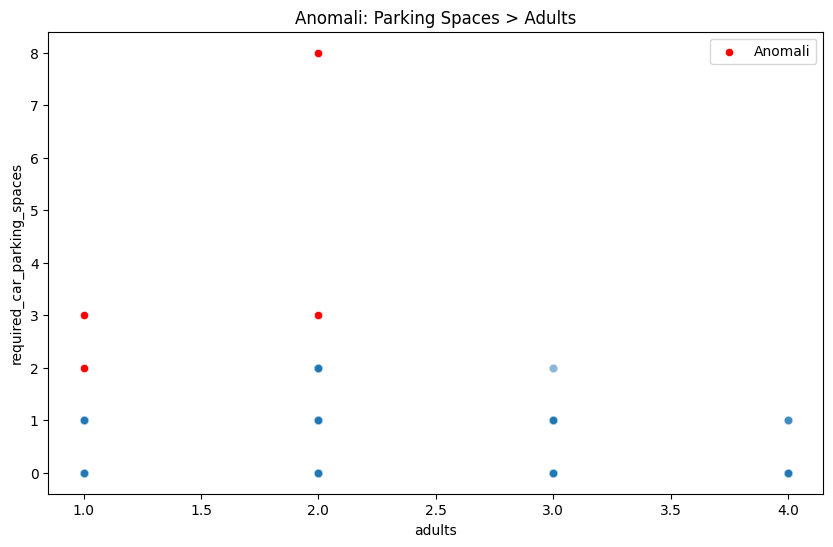

In [177]:
# Anomali: jumlah parkir melebihi jumlah dewasa
anom_parking = hotels_cleaned[
    hotels_cleaned['required_car_parking_spaces'] >
    hotels_cleaned['adults']
]

print("Parking > adults:", len(anom_parking))

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=hotels_cleaned,
    x='adults',
    y='required_car_parking_spaces',
    alpha=0.3
)
sns.scatterplot(
    data=anom_parking,
    x='adults',
    y='required_car_parking_spaces',
    color="red",
    label="Anomali"
)
plt.title("Anomali: Parking Spaces > Adults")
plt.legend()
plt.show()


**Analisis:** Hal ini bisa dianggap valid, jika:
1. Dipesan oleh agent/company.
2. Dipakai untuk acara tertentu yang mengundang banyak orang tetapi tidak semua menginap (misal pernikahan, ulang tahun, dan sebagainya)

**Solusi:** Pertahankan data.

8 - Anomali: Riwayat cancel tidak logis

Previous cancel > previous non-cancel: 5796


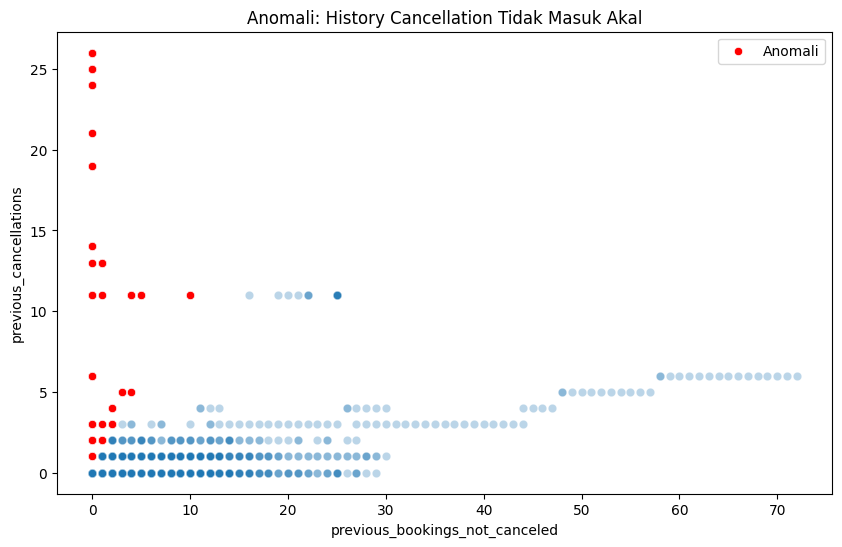

In [178]:
# Anomali: jumlah cancel lebih besar dari booking sukses sebelumnya
anom_prev = hotels_cleaned[
    hotels_cleaned['previous_cancellations'] >
    hotels_cleaned['previous_bookings_not_canceled']
]

print("Previous cancel > previous non-cancel:", len(anom_prev))

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=hotels_cleaned,
    x='previous_bookings_not_canceled',
    y='previous_cancellations',
    alpha=0.3
)
sns.scatterplot(
    data=anom_prev,
    x='previous_bookings_not_canceled',
    y='previous_cancellations',
    color="red",
    label="Anomali"
)
plt.title("Anomali: History Cancellation Tidak Masuk Akal")
plt.legend()
plt.show()


**Analisis:**
Walaupun ada customer yg pernah membatalkan > 5 kali tetapi tidak pernah berhasil menginap, maka bisa saja hal tersebut benar. Misalnya jika di tahun ini customer membatalkan karena tidak jadi menginap, tahun depannya customer ingin menginap di hotel tersebut tapi tetap ada hal lain yang membuatnya tidak bisa menginap.

Tetapi akan dianggap anomali jika previous_cancellation > 0, tetapi is_repeated_guest=0, karena hanya tamu yang pernah menginap yang memiliki histori booking.
Logikanya:
* bookings_not_canceled = jumlah reservasi yang tidak dibatalkan. Bisa saja customer tidak reservasi dulu.
* is_repeated_guest=0, tidak pernah menginap sama sekali

**Solusi:** Pertahankan data.

###**Cek Ulang Statistik Deskriptif Untuk Handle Outliers**

In [179]:
print("\n\nStatistik deskriptif kolom numerik:\n")
display(hotels_cleaned.describe())



Statistik deskriptif kolom numerik:



,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,...,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_stays,total_kids,total_guests,zero_guests
count,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,...,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849,114849.000000,114849.000000,114849.000000,114849.0
mean,105.890265,2016.158382,27.109483,15.806076,0.932564,2.513431,1.863769,0.092670,0.007680,0.083336,...,0.212444,2.385741,102.522934,0.061376,0.569487,2016-07-29 12:24:01.015594240,3.445994,0.100349,1.964118,0.0
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,30.000000,0.000000,0.000000,2014-10-17 00:00:00,1.000000,0.000000,1.000000,0.0
25%,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,71.460000,0.000000,0.000000,2016-02-02 00:00:00,2.000000,0.000000,2.000000,0.0
50%,72.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-07 00:00:00,3.000000,0.000000,2.000000,0.0
75%,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-07 00:00:00,4.000000,0.000000,2.000000,0.0
max,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,26.000000,...,18.000000,391.000000,252.000000,8.000000,5.000000,2017-09-14 00:00:00,69.000000,10.000000,12.000000,0.0
std,107.293231,0.706731,13.558797,8.783845,0.990423,1.876836,0.471965,0.372603,0.096398,0.784130,...,0.624966,17.862284,42.536422,0.243299,0.789046,NaN,2.508722,0.386863,0.629737,0.0


###**Data Overview Setelah Cleaning**

In [180]:
# Menampilkan jumlah baris dan kolom dataset
print("Jumlah baris dan kolom setelah cleaning:")
print(hotels_cleaned.shape)

# Menampilkan jumlah missing values per kolom
print("\nJumlah Missing Values per Kolom setelah cleaning:")
print(hotels_cleaned.isnull().sum())
# print(hotels_cleaned.isna().sum())

# Menampilkan persentase missing values per kolom
print("\nPersentase Missing Values per Kolom setelah cleaning:")
print((hotels_cleaned.isnull().sum() / len(hotels) * 100).round(2))

Jumlah baris dan kolom setelah cleaning:
(114849, 36)

Jumlah Missing Values per Kolom setelah cleaning:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                        

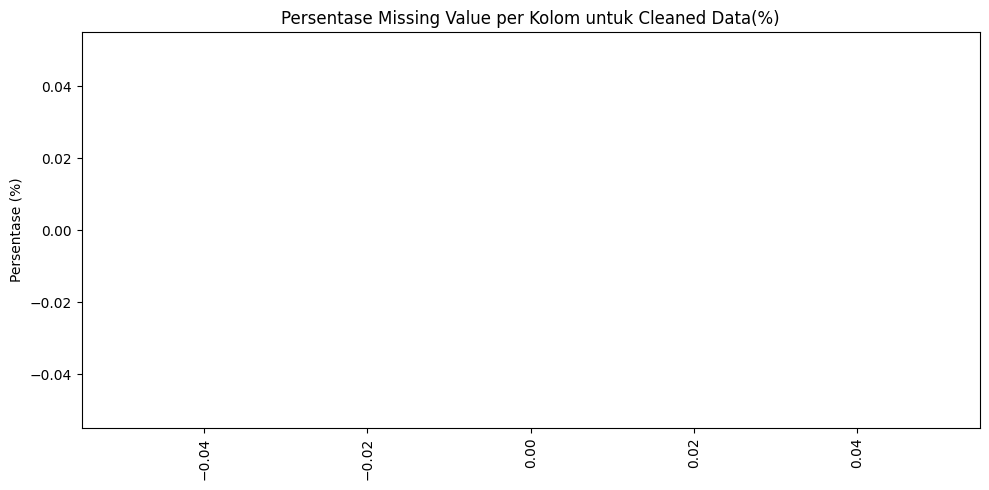

In [181]:
# Hitung persentase missing value
missing_percent = (hotels_cleaned.isna().sum() / len(hotels_cleaned)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
bars = plt.bar(missing_percent.index, missing_percent.values)

plt.title("Persentase Missing Value per Kolom untuk Cleaned Data(%)")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.2f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [182]:
# 1. Bentuk data (baris, kolom)
print("Bentuk dataset setelah cleaning:", hotels_cleaned.shape)

# 2. Informasi struktur data (tipe data & non-null count)
print("\n\nInformasi dataset setelah cleaning:\n")
hotels_cleaned.info()

# 3. Statistik deskriptif kolom numerik
print("\n\nStatistik deskriptif kolom numerik:\n")
display(hotels_cleaned.describe())

# 4. Statistik deskriptif kolom kategorik
print("\n\nStatistik deskriptif kolom kategorik:\n")
display(hotels_cleaned.describe(include='object'))

# 5. 5 baris pertama data
print("\n\n 5 data teratas:\n")
display(hotels_cleaned.head())

Bentuk dataset setelah cleaning: (114849, 36)


Informasi dataset setelah cleaning:

<class 'pandas.core.frame.DataFrame'>
Index: 114849 entries, 2 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           114849 non-null  category      
 1   is_canceled                     114849 non-null  bool          
 2   lead_time                       114849 non-null  int64         
 3   arrival_date_year               114849 non-null  int64         
 4   arrival_date_month              114849 non-null  category      
 5   arrival_date_week_number        114849 non-null  int64         
 6   arrival_date_day_of_month       114849 non-null  int64         
 7   stays_in_weekend_nights         114849 non-null  int64         
 8   stays_in_week_nights            114849 non-null  int64         
 9   adults                          114849 non-nu

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,...,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_stays,total_kids,total_guests,zero_guests
count,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,...,114849.000000,114849.000000,114849.000000,114849.000000,114849.000000,114849,114849.000000,114849.000000,114849.000000,114849.0
mean,105.890265,2016.158382,27.109483,15.806076,0.932564,2.513431,1.863769,0.092670,0.007680,0.083336,...,0.212444,2.385741,102.522934,0.061376,0.569487,2016-07-29 12:24:01.015594240,3.445994,0.100349,1.964118,0.0
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,30.000000,0.000000,0.000000,2014-10-17 00:00:00,1.000000,0.000000,1.000000,0.0
25%,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,71.460000,0.000000,0.000000,2016-02-02 00:00:00,2.000000,0.000000,2.000000,0.0
50%,72.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-07 00:00:00,3.000000,0.000000,2.000000,0.0
75%,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-07 00:00:00,4.000000,0.000000,2.000000,0.0
max,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,26.000000,...,18.000000,391.000000,252.000000,8.000000,5.000000,2017-09-14 00:00:00,69.000000,10.000000,12.000000,0.0
std,107.293231,0.706731,13.558797,8.783845,0.990423,1.876836,0.471965,0.372603,0.096398,0.784130,...,0.624966,17.862284,42.536422,0.243299,0.789046,NaN,2.508722,0.386863,0.629737,0.0




Statistik deskriptif kolom kategorik:



,country
count,114849
unique,176
top,PRT
freq,45938




 5 data teratas:



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_kids,total_guests,zero_guests
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,1,0
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,1,0
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,0,2,0
5,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,0,2,0
6,Resort Hotel,False,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,2,0,2,0


#**D. Exploratory Data Analysis**
Minim
- 3 visualisasi

-  2 tabel ringkasan

-  Interpretasi untuk setiap output

# **Analisis Waktu untuk Pengembangan Hotel**

###**A. Analisis Tren berdasarkan tipe hotel**

In [183]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Add this line to create the 'arrival_date_month_ordered' column
hotels_cleaned['arrival_date_month_ordered'] = pd.Categorical(
    hotels_cleaned['arrival_date_month'],
    categories=month_order,
    ordered=True
)

city_monthly = hotels_cleaned[hotels_cleaned['hotel'] == 'City Hotel']['arrival_date_month_ordered'].value_counts().sort_index()

resort_monthly = hotels_cleaned[hotels_cleaned['hotel'] == 'Resort Hotel']['arrival_date_month_ordered'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=city_monthly.index, y=city_monthly.values, mode="lines+markers", name="City Hotel", line=dict(color="#F4D01C", width=3),
    marker=dict(size=8), hovertemplate="<b>Bulan:</b> %{x}<br><b>Booking:</b> %{y}<extra></extra>"
))

fig.add_trace(go.Scatter(
    x=resort_monthly.index, y=resort_monthly.values, mode="lines+markers", name="Resort Hotel",
    line=dict(color="#06733D", width=3), marker=dict(size=8), hovertemplate="<b>Bulan:</b> %{x}<br><b>Booking:</b> %{y}<extra></extra>"
))

fig.update_layout(
    title="Tren Booking Bulanan City Hotel dan Resort Hotel", xaxis_title="Bulan", yaxis_title="Jumlah Booking",
    yaxis=dict(dtick=500),
    template="plotly_white",
    title_x=0.5
)
fig.show()


**Interpretasi** :

**City Hotel**

- Januari rendah : setelah libur akhir tahun, perjalanan bisnis masih sepi.

- Februari - Mei naik : kegiatan kantor & event bisnis kembali aktif.

- Agustus puncak : wisatawan summer holiday memadati kota-kota besar.

- September - Oktober stabil : banyak event dan travel bisnis menjelang Q4.

- November - Desember turun : akhir tahun jarang ada perjalanan kerja.

Dalam kesimpulan : City Hotel ramai karena kombinasi tamu bisnis & wisata musiman.

**Resort Hotel**

- Januari rendah : cuaca dingin, bukan musim liburan pantai.
- Februari - April naik : awal musim semi, mulai ada wisata ringan.

- Juli puncak : libur sekolah + cuaca terbaik untuk resort.
- Agustus sedikit turun : harga peak season membuat sebagian tamu pindah ke Juli.
- Oktober - November turun : cuaca mulai dingin, demand resort menurun.
- Desember naik sedikit : liburan Natal & Tahun Baru.

Dalam kesimpulan : Resort Hotel sangat dipengaruhi oleh musim, cuaca, dan liburan keluarga.

**Saran untuk Pihak Hotel :**

**City Hotel** perlu menyeimbangkan strategi antara pasar bisnis dan wisata musiman.

**Resort Hotel** harus sangat adaptif terhadap musim dan cuaca, dengan fokus pada peak season dan promosi agresif saat low season.

---

### **B. Analisis Tren Musiman Jumlah Booking Hotel per Bulan Berdasarkan Tahun**

In [184]:
import plotly.graph_objects as go
import pandas as pd


# Define monthly_counts by grouping by year and ordered month and counting bookings
monthly_counts = hotels_cleaned.groupby(['arrival_date_year', 'arrival_date_month_ordered']).size().unstack(fill_value=0)

monthly_df = monthly_counts.reset_index()
colors = ["#0053D1", "#F4D01C", "#1a9641"]  # merah, kuning, hijau

fig = go.Figure()

for i, year in enumerate(monthly_df["arrival_date_year"]):
    fig.add_trace(go.Scatter(
        x=monthly_df.columns[1:],
        y=monthly_df.iloc[i, 1:],
        mode="lines+markers",
        name=str(year),
        line=dict(color=colors[i % len(colors)], width=3),
        marker=dict(size=7),
        hovertemplate="<b>Tahun:</b> "+str(year)+"<br><b>Bulan:</b> %{x}<br><b>Booking:</b> %{y}<extra></extra>"
    ))

fig.update_layout(
    title="Tren Musiman Jumlah Booking per Tahun",
    xaxis_title="Bulan",
    yaxis_title="Jumlah Booking",
    yaxis=dict(dtick=500, rangemode="tozero"),
    template="plotly_white",
    title_x=0.5
)

fig.show()

/tmp/ipython-input-1218565432.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



>*Data tahun 2015 hanya tersedia mulai bulan Juli, sedangkan data tahun 2017 hanya tersedia hingga bulan September.
Nilai nol pada bulan tertentu bukan menunjukkan tidak adanya booking, melainkan ketiadaan data pada periode tersebut.*

**Interpretasi**

Grafik menunjukkan adanya pola musiman, di mana jumlah booking cenderung meningkat pada pertengahan tahun dan menurun menjelang akhir tahun. Pola ini konsisten dengan kondisi riil industri hotel yang dipengaruhi oleh libur musim panas dan periode liburan.

**Saran untuk Hotel**

- Gunakan pola musiman sebagai dasar perencanaan harga dan kapasitas.
- Fokuskan strategi promosi pada bulan dengan permintaan rendah berdasarkan data yang tersedia.

# **Analisis Distribusi Target Pasar dan Pola Pelanggan**

### **A. Distribusi Negara Asal Tamu dengan Jumlah Pemesanan Terbanyak (Marketing Target - Top 10)**

In [185]:
top_countries = hotels_cleaned['country'].value_counts().nlargest(10)

top_countries_df = top_countries.reset_index()
top_countries_df.columns = ["Negara", "Jumlah Booking"]

fig = px.bar(
    top_countries_df,
    x="Negara",
    y="Jumlah Booking",
    color="Negara",
    color_discrete_sequence=px.colors.diverging.RdYlGn,
    title="Top 10 Negara Asal Tamu"
)

fig.update_traces(
    hovertemplate="<b>Negara:</b> %{x}<br><b>Jumlah Booking:</b> %{y}<extra></extra>"
)

fig.update_layout(
    xaxis_title="Negara",
    yaxis_title="Jumlah Booking",
    template="plotly_white",
    title_x=0.5,
    showlegend=False
)

fig.show()

**Interpretasi**

Sebagian besar tamu berasal dari Portugal (PRT), diikuti oleh negara-negara Eropa seperti Inggris, Prancis, dan Spanyol. Hal ini mencerminkan bahwa pasar utama hotel masih didominasi oleh **wisatawan domestik dan regional Eropa**, yang sesuai dengan lokasi dan karakteristik hotel dalam dataset.

**Saran untuk Hotel**

- Pertahankan pasar domestik sebagai pasar utama.

- Lakukan promosi terarah ke negara Eropa dengan jumlah tamu tinggi.

- Eksplor peluang pasar baru dengan kampanye internasional terbatas.

### **B. Distribusi Segmen Pasar Pemesanan Berdasarkan Jenis Hotel**

In [186]:
segment_df = (
    hotels_cleaned
    .groupby(["market_segment", "hotel"])
    .size()
    .reset_index(name="Jumlah Booking")
)

fig = px.bar(
    segment_df,
    x="market_segment",
    y="Jumlah Booking",
    color="hotel",
    barmode="group",
    color_discrete_map={
        "City Hotel": "#F4D01C",
        "Resort Hotel": "#1a9641"
    },
    title="Distribusi Market Segment per Jenis Hotel"
)

fig.update_traces(
    hovertemplate="<b>Market Segment:</b> %{x}<br><b>Hotel:</b> %{legendgroup}<br><b>Booking:</b> %{y}<extra></extra>"
)

fig.update_layout(
    xaxis_title="Market Segment",
    yaxis_title="Jumlah Booking",
    template="plotly_white",
    title_x=0.5
)

fig.show()


/tmp/ipython-input-2907503185.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Interpretasi**

Booking pada City Hotel dan Resort Hotel didominasi oleh **Online Travel Agent (Online TA**), menunjukkan ketergantungan tinggi pada platform digital. City Hotel juga memiliki porsi lebih besar pada segmen Corporate dan Offline TA/TO, yang sejalan dengan karakteristik tamu bisnis. Sementara itu, Resort Hotel relatif lebih bergantung pada Direct dan Group booking.

**Saran untuk Hotel**

- City Hotel dapat memperkuat kerja sama corporate.
- Resort Hotel dapat fokus pada paket group dan liburan keluarga.
---

### **C. Perbandingan Tamu Baru dan Tamu Berulang dalam Pemesanan Hotel**

In [187]:
guest_df = (
    hotels_cleaned["is_repeated_guest"]
    .value_counts()
    .reset_index()
)

guest_df.columns = ["Repeated Guest", "Jumlah Booking"]

guest_df["Repeated Guest"] = guest_df["Repeated Guest"].map(
    {False: "New Guest", True: "Repeated Guest"}
)

fig = px.bar(
    guest_df,
    x="Repeated Guest",
    y="Jumlah Booking",
    color="Repeated Guest",
    color_discrete_map={
        "New Guest": "#F4D01C",
        "Repeated Guest": "#1a9641"
    },
    title="Proporsi Repeated Guest vs New Guest"
)

fig.update_traces(
    hovertemplate="<b>Tipe Tamu:</b> %{x}<br><b>Jumlah Booking:</b> %{y}<extra></extra>"
)

fig.update_layout(
    xaxis_title="Tipe Tamu",
    yaxis_title="Jumlah Booking",
    template="plotly_white",
    title_x=0.5,
    showlegend=False
)

fig.show()

**Interpretasi**

Sebagian besar booking berasal dari tamu baru, sementara proporsi tamu berulang sangat kecil. **Hal ini menunjukkan bahwa tingkat loyalitas pelanggan masih rendah**. Secara umum, tamu berulang cenderung memiliki risiko pembatalan yang lebih rendah dibandingkan tamu baru.

**Saran untuk Hotel**

- Tingkatkan program loyalitas untuk mendorong tamu kembali menginap.

- Berikan insentif khusus bagi tamu berulang karena lebih stabil dan bernilai jangka panjang.

---

###**D. Distribusi Total Special Request**

In [194]:
sr_df = (
    hotels_cleaned["total_of_special_requests"]
    .value_counts()
    .sort_index()
    .reset_index()
)

sr_df.columns = ["Jumlah Special Requests", "Count"]

fig = px.bar(
    sr_df,
    x="Jumlah Special Requests",
    y="Count",
    color="Jumlah Special Requests",
    color_continuous_scale="YlGn",
    title="Distribusi Total Special Requests"
)

fig.update_traces(
    hovertemplate="<b>Special Requests:</b> %{x}<br><b>Jumlah Booking:</b> %{y}<extra></extra>"
)

fig.update_layout(
    xaxis_title="Jumlah Special Requests",
    yaxis_title="Jumlah Booking",
    template="plotly_white",
    title_x=0.5,
    showlegend=False
)

fig.show()

**Interpretasi**

Sebagian besar tamu **tidak mengajukan special request**, yang sesuai dengan kondisi riil bahwa mayoritas tamu hanya membutuhkan layanan standar. Jumlah tamu menurun seiring bertambahnya special request, dan tamu dengan banyak permintaan biasanya memiliki ekspektasi layanan yang lebih tinggi.

**Saran untuk Hotel**

* Pastikan kualitas layanan standar tetap optimal.
* Berikan perhatian khusus pada tamu dengan special request karena berpengaruh pada kepuasan.
---

#**Analisis Sebab Akibat Pembatalan**

###**A. Analisis Pembatalan untuk tiap Tipe Hotel**

In [188]:
cancel_status_df = (
    hotels_cleaned
    .groupby(["hotel", "is_canceled"])
    .size()
    .reset_index(name="Jumlah")
)
cancel_status_df["Status"] = cancel_status_df["is_canceled"].map(
    {True: "Cancel", False: "Tidak Cancel"}
)
color_map = {
    "Cancel": "#d7191c",
    "Tidak Cancel": "#1a9641"
}
# Pie chart City Hotel
fig_city = px.pie(
    cancel_status_df[cancel_status_df["hotel"] == "City Hotel"],
    names="Status",
    values="Jumlah",
    color="Status",
    color_discrete_map=color_map,
    title="Status Booking – City Hotel",
    hole=0.4
)
fig_city.update_traces(
    hovertemplate="<b>Status:</b> %{label}<br><b>Persentase:</b> %{percent}<extra></extra>",
    textinfo="percent"
)
fig_city.update_layout(template="plotly_white", title_x=0.5)
fig_city.show()

# Pie chart Resort Hotel
fig_resort = px.pie(
    cancel_status_df[cancel_status_df["hotel"] == "Resort Hotel"],
    names="Status",
    values="Jumlah",
    color="Status",
    color_discrete_map=color_map,
    title="Status Booking – Resort Hotel",
    hole=0.4
)
fig_resort.update_traces(
    hovertemplate="<b>Status:</b> %{label}<br><b>Persentase:</b> %{percent}<extra></extra>",
    textinfo="percent"
)
fig_resort.update_layout(template="plotly_white", title_x=0.5)
fig_resort.show()


/tmp/ipython-input-3710088833.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Interprestasi**

City Hotel memiliki tingkat persentase pembatalan yang cukup tinggi di angka 40% dan Resort Hotel yang memiliki 25% tingkat pembatalan pemesanan.

### **B. Analisis Korelasi Heatmap terhadap Pembatalan**

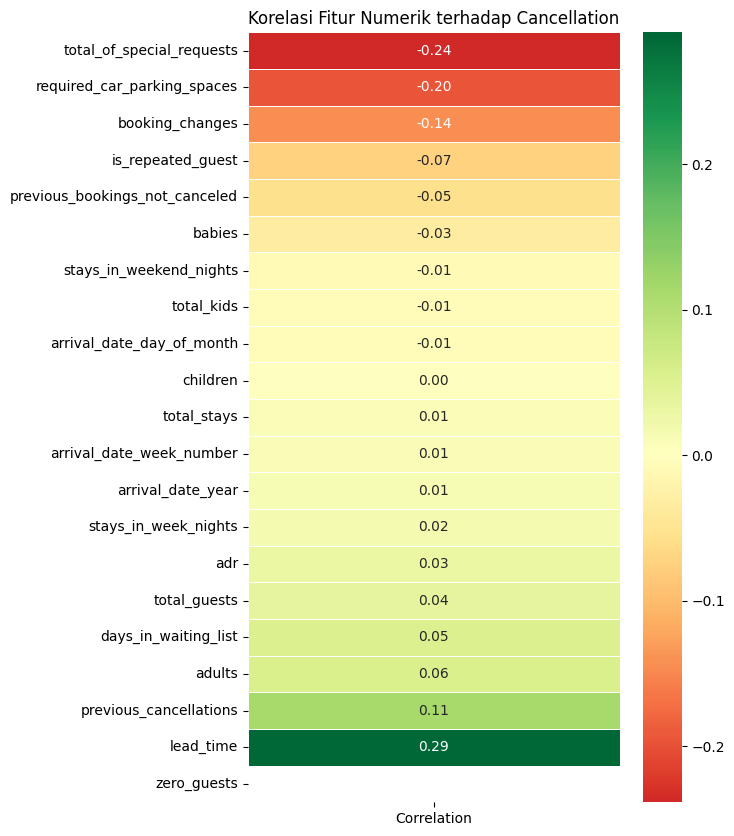

In [189]:
# korelasi hanya terhadap is_canceled
corr_cancel = (
    hotels_cleaned
    .corr(numeric_only=True)['is_canceled']
    .drop('is_canceled')
    .sort_values()
)

# dataframe untuk heatmap
corr_df = corr_cancel.to_frame(name='Correlation')

plt.figure(figsize=(6,10))
sns.heatmap(
    corr_df,
    cmap='RdYlGn',
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Korelasi Fitur Numerik terhadap Cancellation")
plt.show()

Sebagian besar fitur numerik menunjukkan korelasi linear rendah terhadap pembatalan, mengindikasikan pola non-linear dan interaksi antar variabel. **Dalam artian pembatalan tidak dipengaruhi oleh satu variabel numerik secara linear, melainkan oleh kombinasi faktor dan kondisi tertentu.**

---

### **C. Analisis Pembatalan terhadap New Guest vs Repeated Guest**

In [190]:
# Siapkan data
status_df = (
    hotels_cleaned
    .groupby(["is_repeated_guest", "is_canceled"])
    .size()
    .reset_index(name="Jumlah")
)

status_df["Tipe Tamu"] = status_df["is_repeated_guest"].map(
    {False: "New Guest", True: "Repeated Guest"}
)
status_df["Status"] = status_df["is_canceled"].map(
    {False: "Tidak Cancel", True: "Cancel"}
)

# Pie chart untuk New Guest
fig_new = px.pie(
    status_df[status_df["Tipe Tamu"] == "New Guest"],
    names="Status",
    values="Jumlah",
    color="Status",
    color_discrete_map={
        "Cancel": "#d7191c",
        "Tidak Cancel": "#1a9641"
    },
    title="Status Booking – New Guest",
    hole=0.4
)

fig_new.update_traces(
    hovertemplate="<b>Status:</b> %{label}<br><b>Jumlah:</b> %{value}<extra></extra>",
    textinfo="percent"
)

fig_new.update_layout(template="plotly_white", title_x=0.5)
fig_new.show()


# Pie chart untuk Repeated Guest
fig_repeat = px.pie(
    status_df[status_df["Tipe Tamu"] == "Repeated Guest"],
    names="Status",
    values="Jumlah",
    color="Status",
    color_discrete_map={
        "Cancel": "#d7191c",
        "Tidak Cancel": "#1a9641"
    },
    title="Status Booking – Repeated Guest",
    hole=0.4
)

fig_repeat.update_traces(
    hovertemplate="<b>Status:</b> %{label}<br><b>Jumlah:</b> %{value}<extra></extra>",
    textinfo="percent"
)

fig_repeat.update_layout(template="plotly_white", title_x=0.5)
fig_repeat.show()


### **D. Analisis Pembatalan berdasarkan Deposit Type untuk tiap Hotel Type**

/tmp/ipython-input-383716863.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



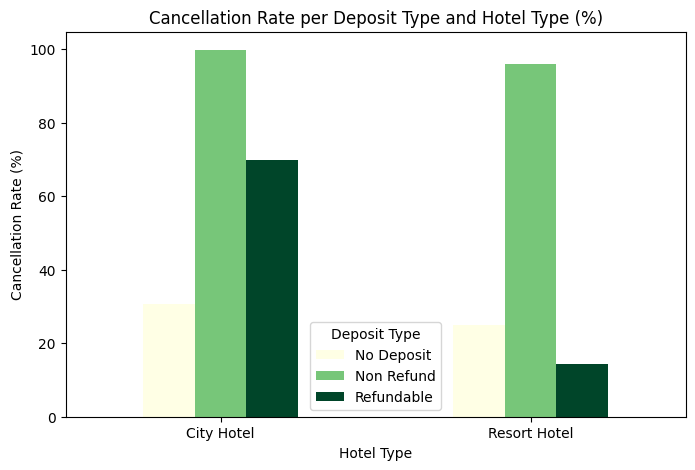

In [191]:
cancel_dep = hotels_cleaned.groupby(['hotel', 'deposit_type'])['is_canceled'].mean().unstack() * 100

# Plot
cancel_dep.plot(
    kind='bar',
    figsize=(8,5),
    colormap='YlGn'
)
# Label
plt.title('Cancellation Rate per Deposit Type and Hotel Type (%)')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Hotel Type')
plt.legend(title='Deposit Type')
plt.xticks(rotation=0)
plt.show()

**Interpretasi**

Grafik menunjukkan bahwa tingkat pembatalan sangat dipengaruhi oleh jenis deposit. Pemesanan dengan deposit non-refundable memiliki tingkat pembatalan tertinggi pada kedua tipe hotel, sementara pemesanan tanpa deposit menunjukkan tingkat pembatalan yang lebih rendah.

**Saran**

Berdasarkan hasil EDA, kebijakan deposit dan karakteristik pemesanan memiliki pengaruh signifikan terhadap pembatalan. Oleh karena itu, hotel disarankan untuk menerapkan kebijakan deposit yang lebih adaptif, memanfaatkan sinyal loyalitas seperti special requests, serta melakukan mitigasi risiko pada pemesanan dengan lead time panjang, khususnya pada City Hotel.

---

### **E. Analisis Tingkat Pembatalan Berdasarkan Tipe Pelanggan untuk Tiap Hotel**

/tmp/ipython-input-4085535402.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



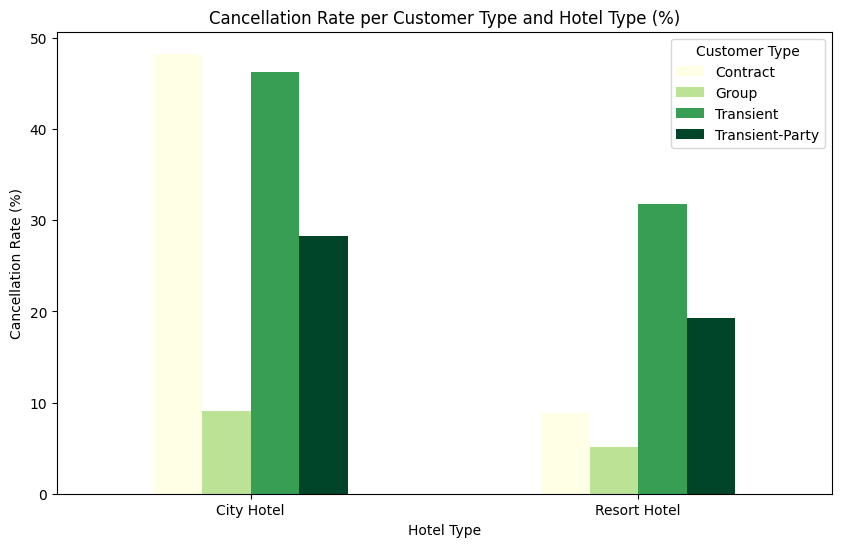

In [192]:
# Hitung cancellation rate per hotel & customer_type
cancel_cust = hotels_cleaned.groupby(['hotel', 'customer_type'])['is_canceled'].mean().unstack() * 100

# Plot
cancel_cust.plot(kind='bar', figsize=(10,6),colormap='YlGn')

# Label
plt.title('Cancellation Rate per Customer Type and Hotel Type (%)')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Hotel Type')
plt.legend(title='Customer Type')
plt.xticks(rotation=0)
plt.show()

**Interpretasi**


Di City Hotel, tipe Contract memiliki tingkat pembatalan tertinggi, sementara Group paling rendah. Hal ini dapat dijelaskan karena mayoritas booking di City Hotel berasal dari Contract, sehingga jumlah pembatalan total terlihat tinggi meskipun secara proporsi mungkin tidak setinggi tipe lain.

Di Resort Hotel, tipe Transient menunjukkan tingkat pembatalan tertinggi, sedangkan Contract paling rendah, mencerminkan karakteristik tamu Resort yang lebih fleksibel dan mudah membatalkan reservasi.

**Saran**

City Hotel
- Terapkan kebijakan deposit atau pembatalan yang lebih ketat untuk pelanggan Contract dan Transient.
- Lakukan konfirmasi ulang untuk booking jarak jauh guna menekan risiko pembatalan.

Resort Hotel
- Pertahankan strategi saat ini untuk pelanggan Group dan Transient-Party karena tingkat pembatalannya relatif rendah.
- Dorong paket bundling dan promo early booking untuk pelanggan Transient agar mengurangi pembatalan.
---

### **F. Perbandingan Lead Time Pemesanan untuk Pembatalan dan Tidak**

/tmp/ipython-input-457648470.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




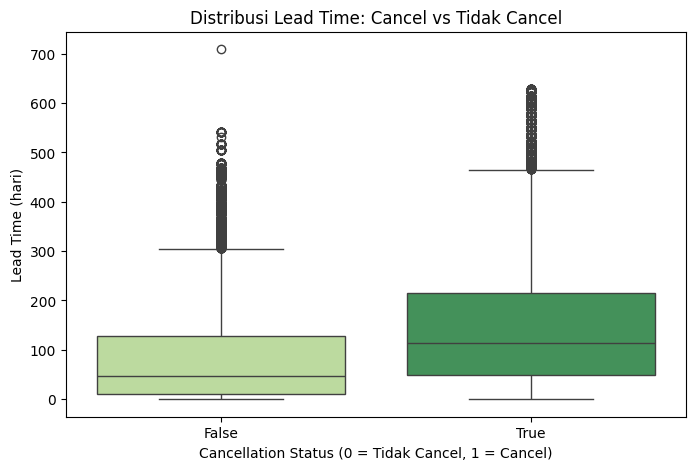

In [193]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=hotels_cleaned,
    x="is_canceled",
    y="lead_time",
    palette="YlGn"
)
plt.title("Distribusi Lead Time: Cancel vs Tidak Cancel")
plt.xlabel("Cancellation Status (0 = Tidak Cancel, 1 = Cancel)")
plt.ylabel("Lead Time (hari)")
plt.show()

**Interpretasi**

Booking yang dibatalkan cenderung memiliki lead time lebih panjang dibandingkan booking yang tidak dibatalkan. Hal ini sesuai dengan kondisi riil, karena pemesanan yang dilakukan jauh hari memiliki risiko perubahan rencana yang lebih tinggi.

**Saran untuk Hotel**
- Terapkan kebijakan pembatalan atau deposit lebih ketat untuk booking dengan lead time panjang.
- Lakukan konfirmasi ulang pada pemesanan jauh hari untuk menurunkan risiko pembatalan.

###**G. Analisis Hubungan Special Request terhadap Pembatalan untuk tiap Hotel Type**

/tmp/ipython-input-2549549691.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



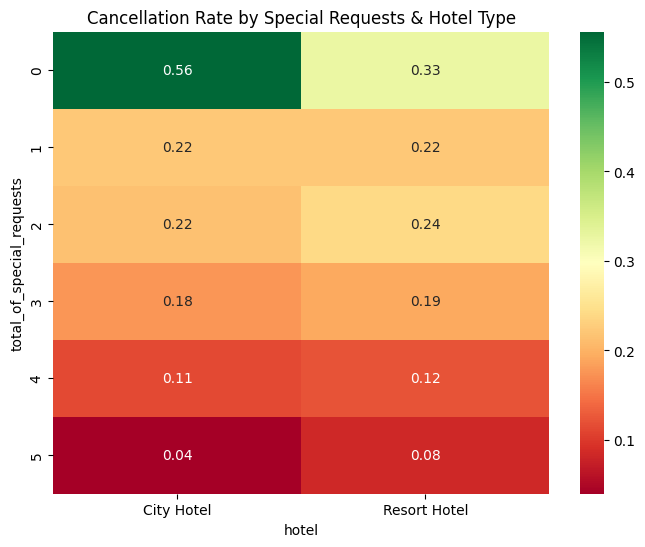

In [195]:
pivot = hotels_cleaned.pivot_table(index='total_of_special_requests', columns='hotel', values='is_canceled', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Cancellation Rate by Special Requests & Hotel Type')
plt.show()

**Interpretasi**

Tamu tanpa special request memiliki tingkat pembatalan paling tinggi, terutama di City Hotel. Semakin banyak special request yang diajukan, tingkat pembatalan cenderung menurun pada kedua jenis hotel. Hal ini menunjukkan bahwa tamu yang mengajukan special request biasanya lebih serius dan memiliki rencana menginap yang lebih pasti.

---

# **Faktor-Faktor yang Mempengaruhi Average Daily Rate (ADR)**

###**A. Analisis Faktor Besar ADR berdasarkan Jenis Hotel, Reserved Room Type, dan Customer Type**

/tmp/ipython-input-3775732666.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




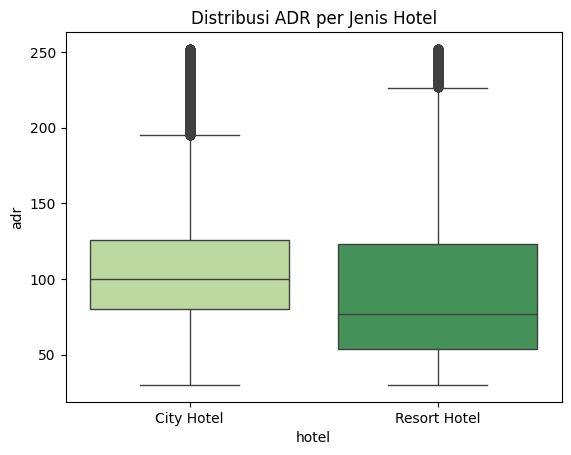

/tmp/ipython-input-3775732666.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




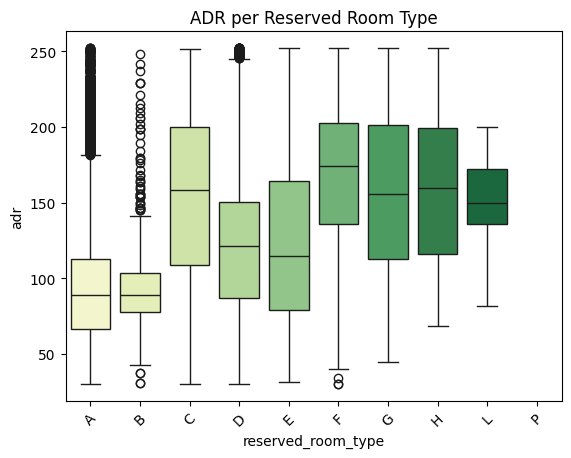

/tmp/ipython-input-3775732666.py:22: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-3775732666.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




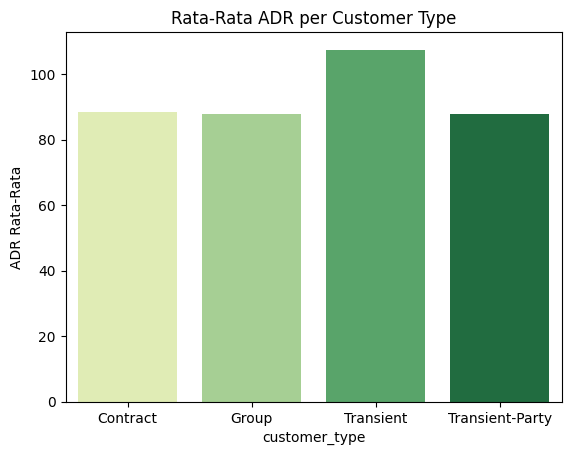

In [197]:
sns.boxplot(
    x='hotel',
    y='adr',
    data=hotels_cleaned,
    palette="YlGn"
)

# ADR vs Jenis Hotel
plt.title("Distribusi ADR per Jenis Hotel")
plt.show()
sns.boxplot(
    x='reserved_room_type',
    y='adr',
    data=hotels_cleaned,
    palette="YlGn"
)

# ADR vs Reservevd Room Type
plt.title("ADR per Reserved Room Type")
plt.xticks(rotation=45)
plt.show()
sns.barplot(
    data=hotels_cleaned,
    x="customer_type",
    y="adr",
    estimator=np.mean,
    ci=None,
    palette="YlGn"
)
# ADR vs Customer Type
plt.title("Rata-Rata ADR per Customer Type")
plt.ylabel("ADR Rata-Rata")
plt.show()


**Interpretasi**

- Jenis hotel berpengaruh terhadap ADR, di mana City Hotel cenderung memiliki ADR lebih tinggi dan lebih stabil dibanding Resort Hotel.

- Tipe kamar menunjukkan perbedaan ADR yang jelas; kamar dengan kode tertentu memiliki median ADR lebih tinggi, mencerminkan perbedaan fasilitas dan kelas kamar.
- Rata-rata ADR tertinggi berasal dari pelanggan Transient, menunjukkan bahwa tamu individual cenderung membayar harga kamar lebih mahal. Sementara itu, Group dan Contract memiliki ADR lebih rendah karena biasanya mendapatkan harga khusus atau diskon volume.


**Saran untuk Hotel**

- Terapkan strategi harga berbeda berdasarkan tipe kamar dan jenis hotel.

- Fokuskan optimasi harga pada tipe kamar dengan ADR tinggi.

- Maksimalkan pendapatan dari segmen Transient dengan strategi dynamic pricing. Pertahankan segmen Group dan Contract sebagai pengisi okupansi, meskipun dengan ADR lebih rendah.

---

###**B. Analisis Faktor Besar ADR berdasarkan Special Request**

In [196]:
req_groups = hotels_cleaned.groupby('total_of_special_requests').agg(bookings=('is_canceled','count'),
                                                         cancel_rate=('is_canceled','mean'),
                                                         avg_adr=('adr','mean')).reset_index()
req_groups = req_groups.sort_values(by='total_of_special_requests')

fig2 = px.bar(
    req_groups,
    x='total_of_special_requests',
    y='avg_adr',
    color='avg_adr',
    color_continuous_scale='YlGn',
    title='Average ADR per Special Request'
)
fig2.show()



**Interpretasi**

Grafik menunjukkan bahwa rata-rata ADR meningkat seiring bertambahnya jumlah special request. Hal ini mencerminkan kondisi riil bahwa tamu dengan banyak permintaan khusus cenderung memilih kamar dengan harga lebih tinggi dan memiliki kebutuhan layanan yang lebih spesifik.

**Saran untuk Hotel**

- Manfaatkan special request sebagai indikator tamu bernilai tinggi.
- Pertimbangkan penawaran layanan tambahan atau **upselling** untuk tamu dengan special request tinggi.

---

#**E. Ringkasan & Kesimpulan**

### **1. Temuan Utama**

- Pada tahap data cleaning, ditemukan duplikasi data dalam jumlah besar

- Terdapat beberapa missing value, terutama pada variabel children, country, agent, dan company, yang ditangani berdasarkan konteks bisnis hotel, sehingga tidak menghilangkan informasi penting.

- Ditemukan berbagai anomali logis, seperti tamu menginap tanpa jumlah tamu yang valid, lama menginap nol tanpa pembatalan, serta nilai ADR ekstrem, yang menunjukkan pentingnya validasi data sebelum analisis lanjutan.

- Hasil Exploratory Data Analysis (EDA) menunjukkan adanya pola musiman yang kuat, dengan peningkatan booking pada pertengahan tahun yang berkaitan dengan liburan dan musim panas.

- - City Hotel memiliki jumlah booking lebih tinggi dan lebih stabil sepanjang tahun, sedangkan Resort Hotel sangat dipengaruhi oleh musim dan cuaca.

- - Tingkat pembatalan dipengaruhi oleh jenis hotel, tipe pelanggan, lead time, dan special request, di mana tamu berulang dan booking dengan special request cenderung memiliki risiko pembatalan lebih rendah.

- - Analisis ADR menunjukkan bahwa harga kamar dipengaruhi oleh beberapa faktor termasuk jenis hotel, tipe kamar, dan tipe pelanggan

### **2. Keterbatasan**

- Dataset tidak mencakup satu tahun penuh, di mana data tahun 2015 hanya tersedia mulai Juli dan data tahun 2017 berakhir pada Agustus.

- Tidak tersedia ID unik pemesanan, sehingga sulit melacak perilaku tamu secara individual.

- Beberapa variabel mengandung anomali dan missing value yang meskipun telah ditangani, tetap berpotensi memengaruhi hasil analisis.

### **3. Saran Pengembangan**

Hotel disarankan menerapkan strategi harga dan promosi berbasis musim, khususnya untuk memaksimalkan pendapatan pada periode puncak dan menjaga okupansi saat low season.

Lalu juga terapkan kebijakan pembatalan yang lebih ketat untuk booking dengan lead time panjang dan segmen pelanggan berisiko tinggi.

Untuk saran kedepannya, tambahkan  program loyalitas untuk mendorong tamu berulang karena lebih stabil dan bernilai jangka panjang.

Untuk analisis lanjutan, dapat dikembangkan model prediksi pembatalan atau forecasting permintaan berbasis waktu dengan penyediaan dataset yang lebih lengkap dan maksimal.


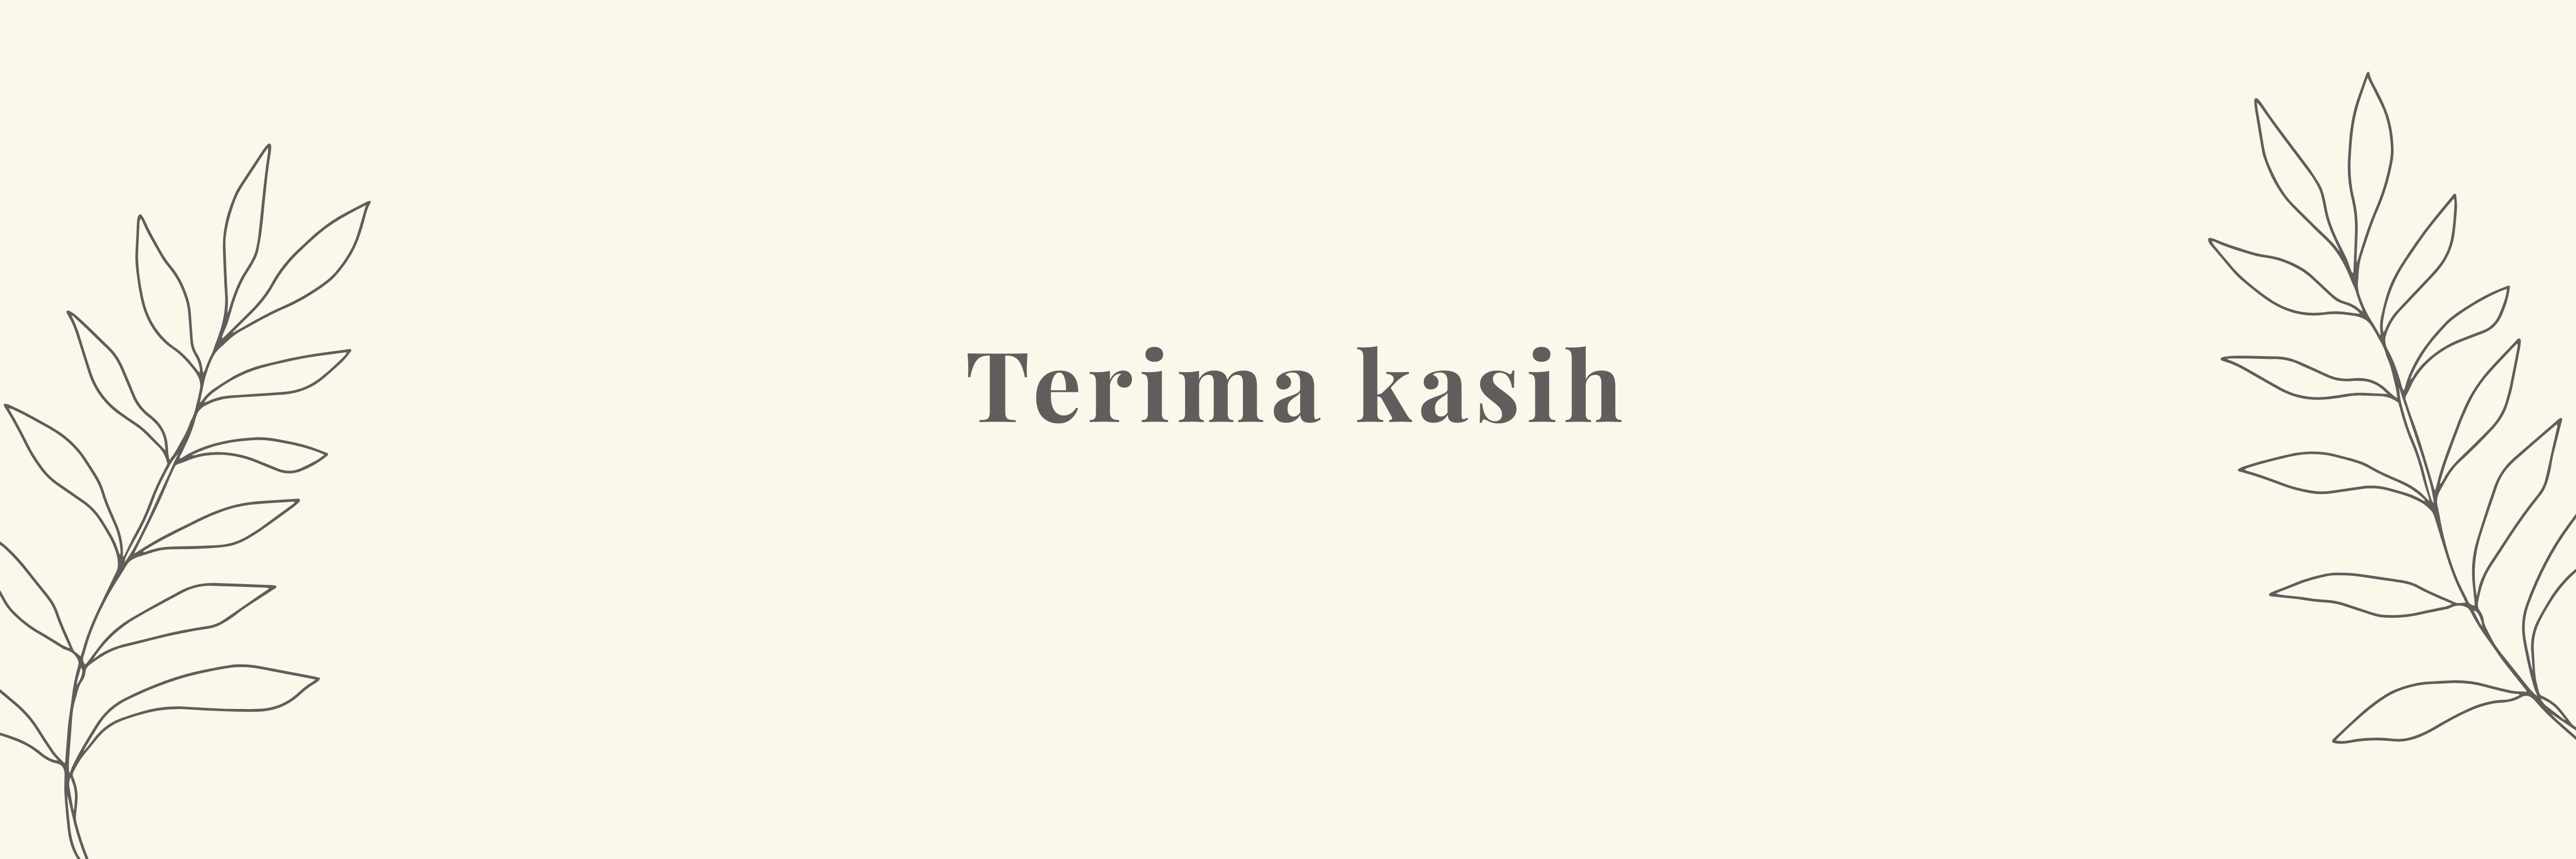